In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed

In [5]:
df = pd.read_csv("http://51.91.120.89/extras/train.csv")
df.sample(n=5, random_state=0)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
225,225,0.0,-0.985,0.861,1.744,-0.938,0.688,-0.118,-1.560,3.766,-0.939,-2.256,-0.955,-2.658,0.136,-0.520,-0.940,0.034,0.209,0.092,-0.285,0.448,-0.005,0.654,0.484,-0.351,2.101,-0.843,-0.494,-0.472,1.412,0.387,-2.020,-1.751,1.340,-1.662,-0.420,-1.185,-0.413,1.988,...,0.143,0.537,1.705,1.333,1.463,-0.454,1.376,-0.873,2.351,1.755,-0.600,-0.625,1.132,0.352,-0.485,1.718,1.283,-0.513,0.604,-0.868,0.999,-0.402,0.055,-0.078,1.070,-0.280,0.161,-0.574,-0.043,-0.349,1.096,-0.471,0.366,0.581,1.059,1.393,-1.766,-0.583,-0.283,-0.122
122,122,1.0,0.280,0.568,-0.206,0.434,1.555,-0.050,1.192,-0.113,-1.140,1.232,-0.448,1.371,-0.215,0.226,-0.053,0.616,-1.369,-0.631,0.698,-0.725,0.997,-0.355,0.537,0.997,0.154,-0.839,-0.086,-0.833,-0.169,0.081,-0.592,-1.298,0.587,-2.069,1.256,0.479,1.655,0.066,...,1.333,-0.251,0.225,-1.008,0.027,-0.208,-0.045,-0.289,-0.215,-0.426,-1.310,-0.872,0.444,0.493,-0.092,-2.077,-1.071,0.872,0.097,-0.470,0.536,1.121,-0.934,1.700,-0.378,-0.883,0.555,0.615,-0.468,0.114,-0.466,-1.557,-0.443,-0.581,-0.620,-0.798,-1.517,-0.954,0.411,0.073
92,92,0.0,1.974,-0.331,-0.197,0.940,-0.226,1.009,-0.373,-1.127,1.313,0.714,0.156,0.357,0.326,-0.018,-1.988,0.978,-0.593,-1.735,-0.778,-0.701,1.546,-0.588,-0.414,0.211,0.478,-0.102,-0.685,-1.413,0.471,-1.706,-0.001,-1.024,1.814,1.733,1.380,1.057,-1.040,0.339,...,-0.082,0.551,1.299,-0.021,0.788,-0.701,0.378,-0.331,0.724,0.716,0.473,-0.168,-1.268,-1.822,-1.098,0.213,-1.031,0.742,-0.746,0.043,0.796,0.054,-1.480,-1.925,-0.640,-0.390,-0.827,0.337,-1.016,-0.563,-0.037,0.374,-2.225,-0.589,1.409,1.150,-2.193,-0.654,0.572,0.141
157,157,0.0,-0.090,-0.328,0.212,-1.752,0.005,-0.930,-0.029,-0.934,1.423,0.536,-1.704,0.254,1.419,-0.597,1.429,1.906,0.568,0.435,-1.605,1.539,0.045,1.079,0.254,0.376,1.426,-0.057,0.899,1.044,0.660,-0.250,0.746,0.532,0.514,0.729,0.382,0.492,-0.575,-0.087,...,-1.670,1.534,-0.292,-0.396,-1.765,-0.907,-0.524,0.640,-0.656,-0.136,-0.223,-1.332,-0.387,-1.036,-2.016,2.151,0.198,1.077,-0.792,-0.080,-2.374,0.242,0.591,1.721,0.245,-0.393,-0.428,-0.779,-0.391,0.745,1.004,-1.204,-0.798,2.283,0.431,-0.696,1.359,-0.369,-1.273,0.865
154,154,1.0,-0.068,-1.260,0.180,1.420,1.822,-1.054,1.039,1.303,0.794,-0.741,0.222,-0.137,-0.786,0.214,1.389,0.391,-2.677,-0.824,0.696,-0.471,-1.543,1.214,0.435,-0.423,0.120,1.214,0.489,-0.354,-0.284,-1.093,-1.134,-0.650,2.077,-0.742,-0.785,0.478,0.399,-1.090,...,0.980,-0.045,0.306,-1.756,-1.870,-1.285,0.085,0.318,-0.174,0.147,1.683,0.518,0.649,-0.735,0.630,-0.148,-1.240,-0.488,0.934,1.175,-0.020,0.347,-0.571,0.525,0.783,1.102,-1.253,-0.880,1.068,-1.235,0.723,0.647,-0.828,0.183,0.481,1.081,-1.448,2.060,-0.164,-1.191


In [6]:
X = df.iloc[:, 2:]
y = df.target.astype('int')

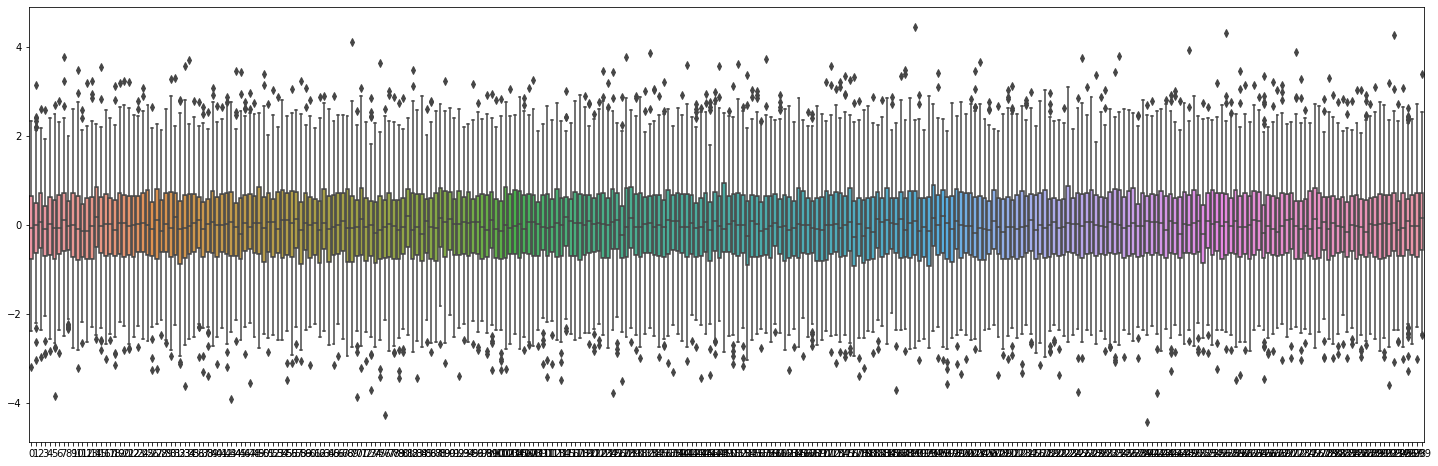

In [7]:
plt.figure(figsize=(25,8))
sns.boxplot(data=X)

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

set_seed(0)

model = Sequential()

model.add( Dense(300) )
model.add( Dense(64, activation="relu") )
model.add( Dropout(0.2) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid") )

model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

result = model.fit(X_train, y_train, epochs=600, validation_split=0.2, verbose=0)


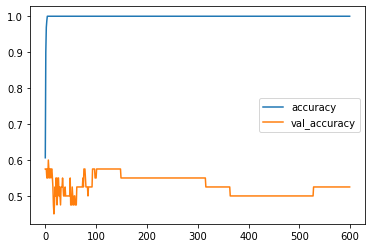

In [14]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy","val_accuracy"] ].plot()

In [17]:
X_norm = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.2, random_state=42)

set_seed(0)

model = Sequential()

model.add( Dense(300, activation="relu") )
model.add( Dropout(0.2) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="tanh") )

model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

result = model.fit(X_train, y_train, epochs=600, validation_split=0.2, verbose=0)


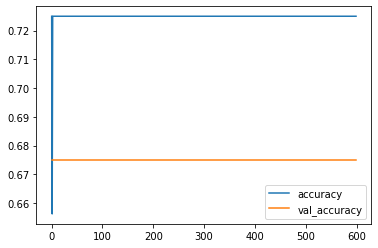

In [18]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy","val_accuracy"] ].plot()

In [19]:
# ekstracja najlepszych cech
from sklearn.feature_selection import SelectKBest, chi2

In [20]:
X_best = SelectKBest(chi2, k=10).fit_transform(X_train , y_train)

In [24]:
set_seed(0)

model = Sequential()

model.add( Dense(300, activation="relu") )
model.add( Dropout(0.3) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="tanh") )

model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

result = model.fit(X_best, y_train, epochs=100, validation_split=0.2, verbose=0)


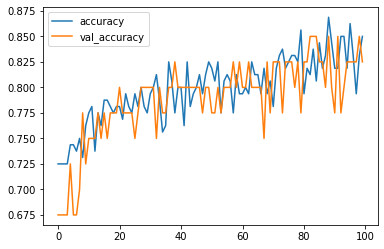

In [25]:
df1 = pd.DataFrame(result.history)
df1[ ["accuracy","val_accuracy"] ].plot()